In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [4]:
t=np.array([6.5,9.3,14.6])
x=np.array([3.2,9.7,11.3])
sigma1=np.array([1.2,2.1,3.6])
sigma2=np.array([1.2,2.1,30])


In [5]:
#Caso A y B
coef1 = np.polyfit((t[0],t[1]), (x[0],x[1]), 1)
coef2 = np.polyfit((t[1],t[2]), (x[1],x[2]), 1)

In [14]:
def chi2_1(a):
        return np.sum(((x - (a[0] * t + a[1])) / sigma1)**2)
def chi2_2(a):
        return np.sum(((x - (a[0] * t + a[1])) / sigma2)**2)

#caso 3
res = minimize(chi2_1,[0,0])
coef3 = res.x

res2=minimize(chi2_2,[0,0])
coef4=res2.x


print(f"Caso A: a1={coef1[0]} a0= {coef1[1]} chi2= {chi2_1(coef1)}")
print(f"Caso B: a1={coef2[0]} a0= {coef2[1]} chi2= {chi2_1(coef2)}")
print(f"Caso C: a1={coef3[0]} a0= {coef3[1]} chi2= {chi2_1(coef3)}")
print(f"Caso D: a1={coef4[0]} a0= {coef4[1]} chi2= {chi2_2(coef4)}")


Caso A: a1=2.3214285714285734 a0= -11.889285714285739 chi2= 8.840003188775505
Caso B: a1=0.30188679245283057 a0= 6.89245283018868 chi2= 22.205433428266307
Caso C: a1=1.2457770455657349 a0= -4.367339945400541 chi2= 2.082079323387609
Caso D: a1=2.258600696761272 a0= -11.449935225688565 chi2= 0.12161203290157317


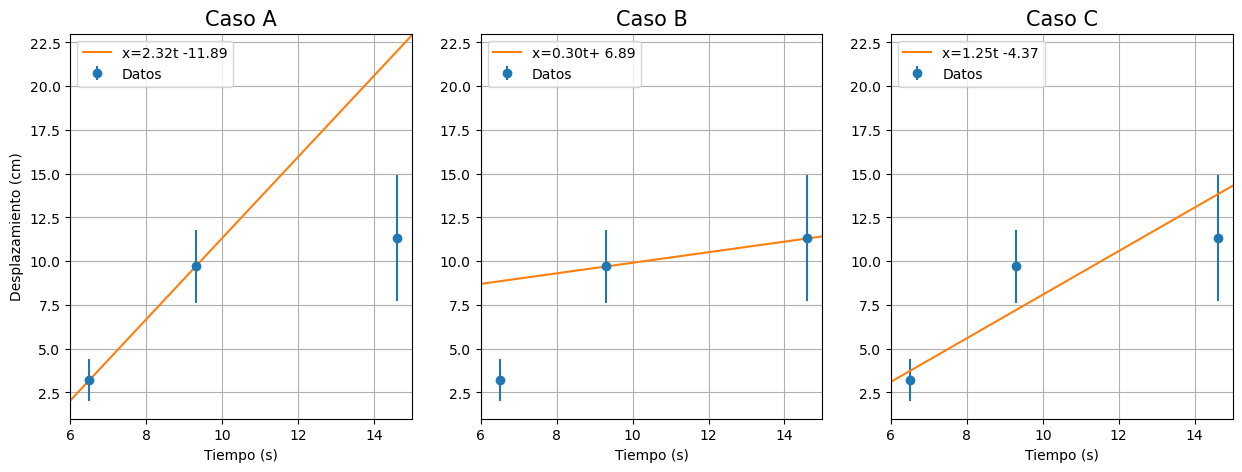

In [7]:
#graficación
t1=np.linspace(0,20,100)
def recta(a,b):
    return a*t1+b

fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].errorbar(t, x, yerr=sigma1, fmt='o', label='Datos')
ax[0].plot(t1, recta(coef1[0],coef1[1]),label=f"x={coef1[0]:.2f}t {coef1[1]:.2f}")
ax[0].set_title('Caso A' , fontsize = 15)
ax[0].legend(loc = 2)
ax[0].grid(True)
ax[0].set_xlabel("Tiempo (s)")
ax[0].set_ylabel("Desplazamiento (cm)")
ax[0].set_xlim(6,15)
ax[0].set_ylim(1,23)

ax[1].errorbar(t, x, yerr=sigma1, fmt='o', label='Datos')
ax[1].plot(t1, recta(coef2[0],coef2[1]),label=f"x={coef2[0]:.2f}t+ {coef2[1]:.2f}")
ax[1].set_title('Caso B' , fontsize = 15)
ax[1].legend(loc = 2)
ax[1].grid(True)
ax[1].set_xlabel("Tiempo (s)")
ax[1].set_xlim(6,15)
ax[1].set_ylim(1,23)

ax[2].errorbar(t, x, yerr=sigma1, fmt='o', label='Datos')
ax[2].plot(t1, recta(coef3[0],coef3[1]),label=f"x={coef3[0]:.2f}t {coef3[1]:.2f}")
ax[2].set_title('Caso C' , fontsize = 15)
ax[2].legend(loc = 2)
ax[2].grid(True)
ax[2].set_xlabel("Tiempo (s)")
ax[2].set_xlim(6,15)
ax[2].set_ylim(1,23)

plt.show()

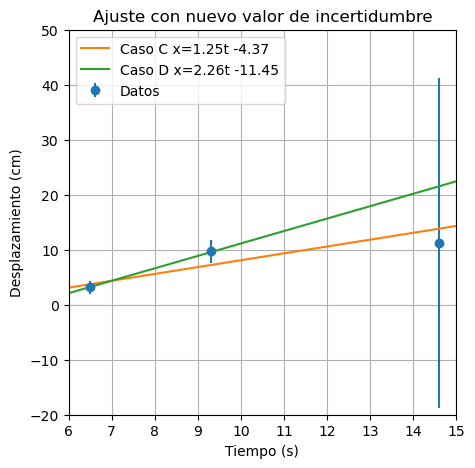

In [8]:
fig,ax=plt.subplots(figsize=(5,5))

ax.errorbar(t, x, yerr=sigma2, fmt='o', label='Datos')
ax.plot(t1, recta(coef3[0],coef3[1]),label=f"Caso C x={coef3[0]:.2f}t {coef3[1]:.2f}")
ax.plot(t1, recta(coef4[0],coef4[1]),label=f"Caso D x={coef4[0]:.2f}t {coef4[1]:.2f}")
ax.set_title('Ajuste con nuevo valor de incertidumbre' )
ax.legend(loc = 2)
ax.grid(True)
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Desplazamiento (cm)")
ax.set_xlim(6,15)
ax.set_ylim(-20,50)

plt.show()

Incertidumbres caso C y D

In [13]:
def sigmas(sig):
    Sx=np.sum(t/sig**2)
    Sxx=np.sum(t**2/sig**2)
    S=np.sum(1/(sig**2))
  
    delta=S*Sxx-(Sx)**2
    sig1=np.sqrt(Sxx/delta)
    sig2=np.sqrt(S/delta)
    print(f"incertidumbre de a0 = {sig1}")
    print(f"incertidumbre de a1 = {sig2}")

print("caso C")
sigmas(sigma1)

print("Caso D")
sigmas(sigma2)


caso C
incertidumbre de a0 = 3.532270759410546
incertidumbre de a1 = 0.43642439889817736
Caso D
incertidumbre de a0 = 6.169627506792889
incertidumbre de a1 = 0.8448166686743926
